In [2]:
#import necessary dependencies 
import pandas as pd
import numpy as np

In [3]:
#read in csv 
data = pd.read_csv('Resources/Crime_Reports.csv')
data.shape

/Users/kellykindla/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2407387, 27)

In [4]:
#code to view all rows
pd.set_option("display.max_rows", None)
#removing spaces in column names 
data.columns = data.columns.str.replace(' ','_')
#preview data
data.sample(5)

,Incident_Number,Highest_Offense_Description,Highest_Offense_Code,Family_Violence,Occurred_Date_Time,Occurred_Date,Occurred_Time,Report_Date_Time,Report_Date,Report_Time,...,Census_Tract,Clearance_Status,Clearance_Date,UCR_Category,Category_Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2029565,20081721464,FELONY ENHANCEMENT/ASSLT W/INJ,909,Y,06/20/2008 02:30:00 PM,06/20/2008,1430.0,06/20/2008 03:30:00 PM,06/20/2008,1530.0,...,23.00,C,07/17/2008,NaN,NaN,3121642.0,3121642.0,30.238673,-97.720380,"(30.23867288, -97.72038001)"
1846109,20115055358,BURGLARY OF VEHICLE,601,N,11/27/2011 10:00:00 PM,11/27/2011,2200.0,11/28/2011 07:57:00 PM,11/28/2011,1957.0,...,300.00,N,11/29/2011,23F,Theft,3106731.0,3106731.0,30.364926,-97.764253,"(30.36492582, -97.76425278)"
707577,20191780938,RENTAL CAR/FAIL TO RETURN,621,N,03/15/2019 05:51:00 PM,03/15/2019,1751.0,06/27/2019 01:55:00 PM,06/27/2019,1355.0,...,9800.00,N,07/10/2019,NaN,NaN,3137228.0,3137228.0,30.212494,-97.671731,"(30.21249438, -97.67173147)"
848117,20162421724,AGG ROBBERY/DEADLY WEAPON,300,N,08/29/2016 09:32:00 PM,08/29/2016,2132.0,08/29/2016 09:32:00 PM,08/29/2016,2132.0,...,403.00,N,08/31/2016,120,Robbery,3129997.0,3129997.0,30.339152,-97.691166,"(30.33915243, -97.69116575)"
1366082,20101601191,AGG ASLT STRANGLE/SUFFOCATE,410,Y,06/09/2010 03:23:00 PM,06/09/2010,1523.0,06/09/2010 03:23:00 PM,06/09/2010,1523.0,...,24.37,NaN,NaN,13A,Aggravated Assault,3096881.0,3096881.0,30.169272,-97.800632,"(30.16927229, -97.80063176)"


In [5]:
#create a year column for occurred date 
data['year'] = pd.DatetimeIndex(data['Occurred_Date']).year
data.head()

,Incident_Number,Highest_Offense_Description,Highest_Offense_Code,Family_Violence,Occurred_Date_Time,Occurred_Date,Occurred_Time,Report_Date_Time,Report_Date,Report_Time,...,Clearance_Status,Clearance_Date,UCR_Category,Category_Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,year
0,20185033598,PROTECTIVE ORDER,3829,N,08/28/2018 07:23:00 AM,08/28/2018,723.0,08/28/2018 07:23:00 AM,08/28/2018,723.0,...,N,08/28/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
1,20195014472,BURGLARY OF VEHICLE,601,N,04/08/2019 10:00:00 PM,04/08/2019,2200.0,04/09/2019 01:09:00 PM,04/09/2019,1309.0,...,N,04/09/2019,23F,Theft,3119486.0,3119486.0,30.292247,-97.725763,"(30.29224653, -97.72576272)",2019
2,2015150483,RAPE,200,N,12/01/2014 09:30:00 AM,12/01/2014,930.0,01/15/2015 09:30:00 AM,01/15/2015,930.0,...,N,01/27/2015,11A,Rape,0.0,0.0,NaN,NaN,NaN,2014
3,20182340152,DOC EXPOSURE,2411,N,08/22/2018 03:12:00 AM,08/22/2018,312.0,08/22/2018 03:12:00 AM,08/22/2018,312.0,...,N,08/28/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
4,20195044494,RAPE,200,N,10/26/2019 12:30:00 AM,10/26/2019,30.0,10/28/2019 03:27:00 PM,10/28/2019,1527.0,...,C,07/27/2020,11A,Rape,0.0,0.0,NaN,NaN,NaN,2019


In [6]:
#filter dataframe to be between 2018-2021
filtered_df = data[data['year']>=2018]
filtered_df = filtered_df[filtered_df['year']<=2021]
filtered_df.shape

(405119, 28)

In [7]:
#how many unique values are there in highest offense description?
filtered_df['Highest_Offense_Description'].nunique()

377

In [8]:
#check value counts for each column
filtered_df['Highest_Offense_Description'].value_counts()

FAMILY DISTURBANCE                               41016
BURGLARY OF VEHICLE                              36838
THEFT                                            32171
CRIMINAL MISCHIEF                                20534
AUTO THEFT                                       13633
ASSAULT W/INJURY-FAM/DATE VIOL                   13219
DISTURBANCE - OTHER                              10903
THEFT BY SHOPLIFTING                             10786
HARASSMENT                                       10581
ASSAULT WITH INJURY                              10180
DWI                                               8599
BURGLARY OF RESIDENCE                             7677
BURGLARY NON RESIDENCE                            7631
ASSAULT BY CONTACT                                7196
CRIMINAL TRESPASS                                 7044
IDENTITY THEFT                                    6479
POSS CONTROLLED SUB/NARCOTIC                      6348
THEFT OF BICYCLE                                  5818
BURGLARY O

In [9]:
#check null values
#do we want to drop null values or do we want to drop the columns? 
filtered_df.isnull().sum(axis = 0)

Incident_Number                     0
Highest_Offense_Description         0
Highest_Offense_Code                0
Family_Violence                     0
Occurred_Date_Time                  0
Occurred_Date                       0
Occurred_Time                       0
Report_Date_Time                    0
Report_Date                         0
Report_Time                         0
Location_Type                    1127
Address                             0
Zip_Code                         2682
Council_District                 4472
APD_Sector                       1692
APD_District                     1775
PRA                              2187
Census_Tract                     3747
Clearance_Status                47729
Clearance_Date                  47739
UCR_Category                   249545
Category_Description           249545
X-coordinate                     2080
Y-coordinate                     2080
Latitude                         7493
Longitude                        7493
Location    

In [10]:
#drop unneccessary columns for our analysis 
dropped_col_df= filtered_df.drop(["Council_District","APD_Sector","APD_District","PRA","Occurred_Time","Report_Time"],axis = 1)
dropped_col_df.shape

(405119, 22)

In [11]:
#checking null valules of latitude -- why does rape disapear when latitude null values are dropped? 
lat_lookup = dropped_col_df.loc[dropped_col_df["Latitude"].isnull()].copy()

In [12]:
#looking at occurances of rape within null latitude values 
lat_lookup["Category_Description"].value_counts()

Rape                  2291
Theft                  240
Aggravated Assault     184
Burglary                77
Auto Theft              50
Robbery                 31
Name: Category_Description, dtype: int64

In [13]:
#dropping nulls of important columns -- dropping latitude will remove rape occurances 
clean_df = dropped_col_df.dropna(axis=0, subset=["Location_Type","Zip_Code","Census_Tract"
                                           ,"Latitude"])


In [14]:
clean_df["Category_Description"].unique()

array(['Theft', nan, 'Burglary', 'Aggravated Assault', 'Robbery',
       'Auto Theft', 'Murder'], dtype=object)

In [15]:
clean_df.shape

(395028, 22)

In [16]:
#replacing nulls for UCR_Category with zero 
clean_df[["UCR_Category"]] = clean_df[["UCR_Category"]].fillna('0')
#replacing nulls with "None"
clean_df[["Category_Description"]] = clean_df[["Category_Description"]].fillna('None')
#replacing nulls with "U" for unkown 
clean_df[["Clearance_Status"]] = clean_df[["Clearance_Status"]].fillna('U')
#replacing nulls with a random date so its obvious on visualizaitons 
clean_df[["Clearance_Date"]] = clean_df[["Clearance_Date"]].fillna('01/01/1888')

/Users/kellykindla/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [17]:
#check nulls
clean_df.isnull().sum(axis = 0)

Incident_Number                0
Highest_Offense_Description    0
Highest_Offense_Code           0
Family_Violence                0
Occurred_Date_Time             0
Occurred_Date                  0
Report_Date_Time               0
Report_Date                    0
Location_Type                  0
Address                        0
Zip_Code                       0
Census_Tract                   0
Clearance_Status               0
Clearance_Date                 0
UCR_Category                   0
Category_Description           0
X-coordinate                   0
Y-coordinate                   0
Latitude                       0
Longitude                      0
Location                       0
year                           0
dtype: int64

In [18]:
#convert occurred date time to datetime dtype
clean_df['Occurred_Date_Time'] =  pd.to_datetime(clean_df['Occurred_Date_Time'])
#create an hour column for the ocurred time
clean_df['hour'] = pd.DatetimeIndex(clean_df['Occurred_Date_Time']).hour
clean_df['hour'].head()


<ipython-input-18-cd4989b6e3c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Occurred_Date_Time'] =  pd.to_datetime(clean_df['Occurred_Date_Time'])
<ipython-input-18-cd4989b6e3c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['hour'] = pd.DatetimeIndex(clean_df['Occurred_Date_Time']).hour


1     22
5     22
6     14
7     12
10    17
Name: hour, dtype: int64

In [19]:
#divide into time buckets
clean_df['hour_category']=pd.cut(clean_df['hour'],
    [0,12,18,21,23],
        labels=['Morning','Afternoon','Evening','Night'],
        include_lowest=True)

<ipython-input-19-8ee2f2771c19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['hour_category']=pd.cut(clean_df['hour'],


In [20]:
clean_df.sample(5)

,Incident_Number,Highest_Offense_Description,Highest_Offense_Code,Family_Violence,Occurred_Date_Time,Occurred_Date,Report_Date_Time,Report_Date,Location_Type,Address,...,UCR_Category,Category_Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,year,hour,hour_category
2074107,20195000224,ONLINE IMPERSONATION,2733,N,2018-12-19 10:00:00,12/19/2018,01/03/2019 09:14:00 AM,01/03/2019,OTHER / UNKNOWN,4401 GUADALUPE ST,...,0,None,3116952.0,3116952.0,30.309785,-97.733321,"(30.30978504, -97.73332134)",2018,10,Morning
267331,20215015223,THEFT,600,N,2021-04-14 09:24:00,04/14/2021,04/17/2021 09:24:00 AM,04/17/2021,RESIDENCE / HOME,927 E 50TH ST,...,23H,Theft,3123089.0,3123089.0,30.310203,-97.713856,"(30.31020286, -97.71385629)",2021,9,Morning
12067,20215009024,THEFT CATALYTIC CONVERTER,620,N,2021-03-06 18:00:00,03/06/2021,03/08/2021 05:29:00 PM,03/08/2021,PARKING LOTS / GARAGE,43 RAINEY ST,...,23G,Theft,3115463.0,3115463.0,30.255998,-97.739487,"(30.25599777, -97.73948707)",2021,18,Afternoon
336549,20185020605,THEFT,600,N,2018-06-02 13:30:00,06/02/2018,06/02/2018 01:30:00 PM,06/02/2018,GROCERY / SUPERMARKET,9414 N LAMAR BLVD,...,23H,Theft,3127650.0,3127650.0,30.364991,-97.697902,"(30.36499057, -97.69790197)",2018,13,Afternoon
1075099,20205049417,CRED CARD ABUSE - OTHER,1106,N,2020-12-03 16:00:00,12/03/2020,12/03/2020 08:45:00 PM,12/03/2020,RESIDENCE / HOME,2121 DICKSON DR,...,0,None,3102347.0,3102347.0,30.246331,-97.781296,"(30.24633121, -97.78129556)",2020,16,Afternoon


In [32]:
group_df = clean_df.groupby(['Zip_Code','hour_category']).count()
group_df

Incident_Number  Highest_Offense_Description  \
Zip_Code hour_category                                                 
78610.0  Morning                     10                           10   
         Afternoon                    8                            8   
         Evening                      3                            3   
         Night                        3                            3   
78612.0  Morning                      1                            1   
         Afternoon                    0                            0   
         Evening                      1                            1   
         Night                        0                            0   
78613.0  Morning                    642                          642   
         Afternoon                  806                          806   
         Evening                    366                          366   
         Night                      126                          126   
78616.0  Morning                      1                            1   
         Afternoon                    0                            0   
         Evening                      0                            0   
         Night                        0                            0   
78617.0  Morning                   1470                         1470   
         Afternoon                  977                          977   
         Evening                    604                          604   
         Night                      366                          366   
78640.0  Morning                      0                            0   
         Afternoon                    2                            2   
         Evening                      0                            0   
         Night                        0                            0   
78641.0  Morning                      3                            3   
         Afternoon                    1                            1   
         Evening                      1                            1   
         Night                        0                            0   
78645.0  Morning                      0                            0   
         Afternoon                    0                            0   
         Evening                      1                            1   
         Night                        0                            0   
78652.0  Morning                     58                           58   
         Afternoon                   35                           35   
         Evening                     20                           20   
         Night                       14                           14   
78653.0  Morning                    165                          165   
         Afternoon                   92                           92   
         Evening                     51                           51   
         Night                       41                           41   
78660.0  Morning                   1159                         1159   
         Afternoon                  957                          957   
         Evening                    570                          570   
         Night                      319                          319   
78664.0  Morning                      4                            4   
         Afternoon                    5                            5   
         Evening                      4                            4   
         Night                        0                            0   
78665.0  Morning                      4                            4   
         Afternoon                    1                            1   
         Evening                      1                            1   
         Night                        0                            0   
78681.0  Morning                      8                            8   
         Afternoon                    6                         

# One Hot Encoder

In [ ]:
#current data type is a category - have to convert to string
clean_df['hour_category'] = clean_df['hour_category'].astype(str)

In [ ]:
#create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

#fit the encoder and produce encoded dataframe
encode_df = pd.DataFrame(enc.fit_transform(clean_df.hour_category.values.reshape(-1,1)))

#rename encoded columns
encode_df.columns = enc.get_feature_names(['time_of_day'])
encode_df.head()

In [ ]:
clean_df2 = clean_df.merge(encode_df, left_index=True, right_index=True,)
clean_df2.head()

In [ ]:
group_df = clean_df2.groupby(['Zip_Code']).sum()
group_df[['time_of_day_Afternoon', 'time_of_day_Evening', 'time_of_day_Morning', 'time_of_day_Night']].head()

In [58]:
import seaborn
import matplotlib.pyplot as plt

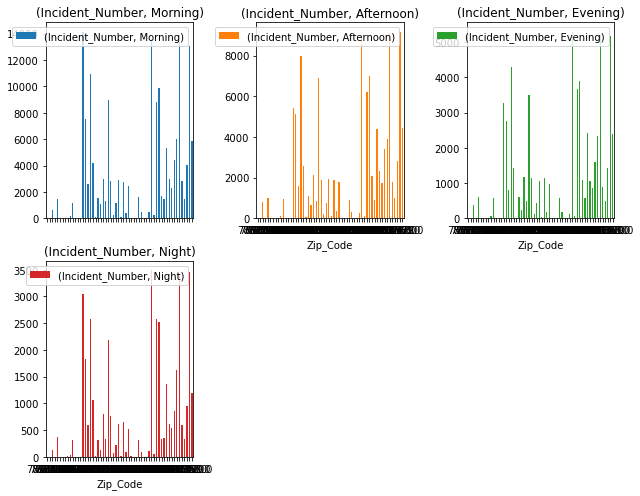

In [57]:
dfp = group_df.pivot_table(index='Zip_Code', columns='hour_category', values=['Incident_Number'], aggfunc='sum')
dfp.plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(2, 3))
plt.tight_layout()

In [20]:
#convert clean_df to csv 
clean_df.to_csv(r'Resources/2018To2021CrimeData_clean.csv')